## <center> Tecnológico de Monterrey
### <center> Modelación de sistemas multiagentes con gráficas computacionales. (TC2008B.1) <br>Actividad integradora<br><br>Manolo Ramírez Pintor<br>A01706155<br>ITESM Campus Querétaro<br>29/11/2021<br>

# Actividad integradora 😁
### **Link del GitHub:** https://github.com/A01706155/TC2008B.1-Actividad-Integradora

## Mini reto:
En esta tarea se nos pide realizar un programa de simulación de unos robots que acomodan un almacén y un entorno gráfico en Unity para representarlo siguiendo la siguiente descripción:
### Descripción del problema: 🧾
¡Felicidades! Eres el orgulloso propietario de 5 robots nuevos y un almacén lleno de cajas. El dueño anterior del almacén lo dejó en completo desorden, por lo que depende de tus robots organizar las cajas en algo parecido al orden y convertirlo en un negocio exitoso. <br><br>Cada  robot  está  equipado  con  ruedas  omnidireccionales  y,  por  lo  tanto,  puede  conducir  en  las cuatro direcciones. Pueden recoger cajas en celdas de cuadrícula adyacentes con sus manipuladores, luego llevarlas a otra ubicación e incluso construir pilas de hasta cinco cajas. Todos los robots están equipados con la tecnología de sensores más nueva que les permite recibir datos de sensores de las cuatro celdas adyacentes. Por tanto, es fácil distinguir si un campo está libre, es una pared, contiene una pila de cajas (y cuantas cajas hay en la pila) o está ocupado por otro robot. Los robots también tienen sensores de presión equipados que les indican si llevan una caja en ese momento.<br><br> Lamentablemente,  tu  presupuesto  resultó  insuficiente  para  adquirir  un  software  de  gestión  de agentes múltiples de última generación. Pero eso no debería ser un gran problema ... ¿verdad? Tu tarea es enseñar a sus robots cómo ordenar su almacén. La organización de los agentes depende de ti, siempre que todas las cajas terminen en pilas ordenadas de cinco.<br><br>

## Reglas del programa 📖
**Procedimiento que debemos meter:**
 1. Debe inicializarse `k` de cajas al nivel del piso.
 2. Los robots comienzan en posiciones aleatorias.
 3. Se ejecuta el tiempo máximo establecido

**Tenemos que poder dar los siguientes datos:** 🔢
1. Tiempo necesario para que las cajas esten apiladas en 5
2. Número de movs realizado por cada robot
3. Analizar si existe una estrategia para disminuir el tiempo y la cantidad de movs realizados.

**Ejecución del programa** 🖥️
1. Si el agente se encuentra en una celda sucia, se limpia
2.  Si el agente está en una celda limpia, este se desplaza a una dirección aleatoria dentro del rango de celdas que se puede desplazar a su alrededor (8), si no se puede mover, se va a quedar donde mismo.
3. Debe existir un tiempo de ejecución máximo para que el programa no corra para siempre en caso de que algo raro pase. 

## Código de solución: 💻

## Librerías a utilizar 📚
Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model). Cada modelo puede contener múltiples agentes.<br>
`from  mesa  import  Agent, Model`<p>

Con ''RandomActivation'', hacemos que todos los agentes puedan moverse ''al mismo tiempo''.<br>
`from  mesa.time  import  SimultaneousActivation`<p>

Haremos uso de ''DataCollector'' para obtener información de cada paso de la simulación.<br>
`from  mesa.datacollection  import  DataCollector`<p>

Matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.<br>
`%matplotlib inline`<br>
`import  matplotlib`<br>
`import  matplotlib.pyplot  as  plt`<br>
`import  matplotlib.animation  as  animation`<br>
`plt.rcParams["animation.html"] = "jshtml"`<br>
`matplotlib.rcParams['animation.embed_limit'] = 2**128`<p>

Para la parte estadística usaremos a Pandas<br>
`import pandas as pd`<p>

Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.<br>
`import  time`<br>
`import  datetime`<p>

Importamos random para poder generar valores aleatorios<br>
`import  random` <p>

In [1]:
# Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model).
# Cada modelo puede contener múltiples agentes.
from mesa import Agent, Model 
# Con ''SimultaneousActivation'', hacemos que todos los agentes puedan moverse ''al mismo tiempo''.
from mesa.time import RandomActivation
# Haremos uso de ''DataCollector'' para obtener información de cada paso de la simulación.
from mesa.datacollection import DataCollector

# Matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Importamos los siguientes paquetes para el mejor manejo de valores numéricos.
import numpy as np

# Para la parte estadística usaremos a Pandas.
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

# Importamos random para poder generar valores aleatorios.
import random

### El Ro-Bot: 🤖
Definiremos al agente que actuará como nuestro robot, este tiene un funcionamiento fijo que es buscar cajas y luego ordenarlas en las pilas requeridas de 5. La primera caja ordenada siempre iniciará en la posición [1,1]<p>

Los robots principalmente cumplen con un movimiento aleatorio con 4 posibles movs:<br>
`N`, (Norte)<br>`S`, (Sur)<br>`E` (Este),<br>`O` (Oeste).<p>

Dependiendo de las acciones, por ejemplo, buscar una caja, se moverán aleatoriamente hasta encontrar la caja. Una vez encontrada la caja se moverán fijamente por una ruta pre-establecida y luego buscarán otra caja sin que tenga el estado de acomodado.

In [2]:
class Robot(Agent):
    """ Mediante el Robot vamos a crer varias instancias del mismo en ubicaciones aleatorias se
        encargarán de revisar cada celda y acomodarán las cajas 'desacomodadas' en pilas de 5"""
    def __init__(self, unique_id, model, x, y, width, height):
        super().__init__(unique_id, model)
        
        # Posicion del robot actual.
        self.pos = np.array((x,y), dtype = int)
        
        # Posicion inicial donde el robot se va a encargar
        # de ordenar cada caja desordenada en el ambiente.
        self.pos_or = np.array((1,1), dtype = int)
        
        # Velocidad del robot dada de forma aleatoria.
        vel_x = np.random.randint(2)
        vel_y = np.random.randint(2)
        self.vel = np.array((vel_x, vel_y), dtype = int)
        
        # Tamaño MxN del espacio de simumacion
        self.width = width
        self.height = height
        
        # Número de movs realizados por el robot agente
        self.movs = 0
        
        # Las posibles direcciones a las cuales se puede
        # mover nuestro robot dentro de la simulación.
        self.direccs = ["N", "S", "E", "O"]
        
        # Establece si el robot tiene una caja sobre él
        # para que vaya a acomodarla o que vaya a buscarla.
        self.transportando = False
        
        # Establece qué agente de caja el robot está
        # cargando, lo identifica para evitar bugs raros.
        self.caja_act = None
        
    def step(self):
        """ Dentro de cada Robot vamos a ver las direcciones posibles a las que el agente se 
            puede mover de acuerdo a las reglas que establecimos. (Por cada paso o step)
            Adicionalmente, va a revisar que no se salga de los boundaries establecidos y
            también que revise si tiene caja y si ya la ha puesto para no volverla a tomar."""
        self.g_bounds()
        self.mover()
        self.rev_dest()
        
        # En caso de que el robot se encuentre cargarndo una caja,
        # vamos a indicarle que lo mueva a donde queremos y que
        # ponga la caja cuando ya esté en la posicion deseada.
        if self.transportando == True:
            self.ir_orilla()
            self.llevar_caja()
            self.mover()
            self.caja_act.vel = self.vel
            self.poner_caja()      
        
        # En caso de que el robot no esté moviendo alguna caja,
        # vamos a indicarle que tome alguna de las que encuentre.
        else:
            self.mov_caja()
        
        # A partir de la posición y velocidad la vamos a actualizar
        self.pos = self.pos + self.vel

        # Finalmente sumaremos un movimiento realizado
        self.movs += 1
        
    # Checar que el robot no pueda irse fuera de los boundaries.
    def g_bounds(self):
        self.direccs = ["N", "S", "E", "O"]

        if self.pos[1] >= self.height - 1:
            self.direccs.remove("N")
        elif self.pos[1] <= 1:
            self.direccs.remove("S")
        
        if self.pos[0] >= self.width - 1:
            self.direccs.remove("E")
        elif self.pos[0] <= 1:
            self.direccs.remove("O")
    
    # Hacemos que el robot se pueda mover a donde sea.
    def mover(self):
        des = np.random.choice(self.direccs)
        
        if des == 'N':
            self.N()
        elif des == 'S':
            self.S()
        elif des == 'E':
            self.E()
        elif des == 'O':
            self.O()
        
    # Establecemos las posiciones a las que nuestro robot
    # puede moverse aleatoriamente con libertad a través
    # del uso de coordenadas.
    def N(self):
        self.vel = np.array((0, 1), dtype = int)
    def S(self):
        self.vel = np.array((0, -1), dtype = int)
    def E(self):
        self.vel = np.array((1, 0), dtype = int)
    def O(self):
        self.vel = np.array((-1, 0), dtype = int)
            
    # Sirve para permitir que el robot tome una caja que se
    # encuentre sin acomodar del piso.
    def mov_caja(self):
        for box in model.props.agents:
            if self.pos[0] == box.pos[0] and self.pos[1] == box.pos[1] and box.done == False:
                box.quiet = False
                box.vel = self.vel
                self.transportando = True
                self.caja_act = box
    
    # Sirve para que el robot en cuestión coloque la caja
    # correctamente en la posición que queremos que esté.
    def poner_caja(self):
        if self.caja_act.pos[0] == self.pos_or[0] and self.caja_act.pos[1] == self.pos_or[1] and self.caja_act.quiet == False:
            model.ordered_boxes.append(self.caja_act)
            self.caja_act.quiet = True
            self.caja_act.done = True
            self.transportando = False
            self.caja_act = None
    
    # Antes de que la caja caiga al suelo, revisar si el lugar
    # donde estará la caja puede ser algo válido o posible.
    def rev_dest(self):
        for box in model.ordered_boxes:
            if box.pos[1] == self.pos_or[1] and box.pos[0] == self.pos_or[0]:
                self.pos_or[1] += 1
            
        if self.pos_or[1] > 5:
            self.pos_or[0] += 2
            self.pos_or[1] = 1
    
    # Ruta pre-establecida para que el robot pueda acomodar la caja
    def ir_orilla(self):
        if self.pos[1] < self.height - 1:
            self.direccs = ["N"]
            
    
    # Definición de la ruta pre-establecida.
    def llevar_caja(self):
        
        if self.pos[1] == self.height - 1 and 1 <= self.pos[0] < self.width - 1:
            self.direccs = ["E"]
        elif self.pos[0] == self.width - 1 and self.pos_or[1] < self.pos[1] <= self.height - 1:
            self.direccs = ["S"]
        elif self.pos[1] == self.pos_or[1] and self.pos_or[0] <= self.pos[0] <= self.width - 1:
            self.direccs = ["O"]
                

### La caja: 📦
Definiremos al agente que actuará como nuestra caja, este no tiene ningún comportamiento en concreto y para que funcione tiene que tener interacción primero con un robot.

In [3]:
# Agente de la caja
class Caja(Agent):
    """ Mediante BoxAgent vamos a crear todas las cajas que estarán en nuestro espacio y se
    encargarán únicamente de estar ahí para ser acomodadas por los robots más adelante """
    def __init__(self, unique_id, model, x, y, width, height):
        super().__init__(unique_id, model)
        
        # Tamaño MxN del espacio de simumacion
        self.width = width
        self.height = height
        
        # Ubicacion de la caja dada aleatoriamente
        self.pos = np.array((x, y), dtype = int)
        
        # El status de la caja nos permite saber si ya fue acomodada o no,
        # nos permite prevenir que el robot pueda tomar la caja nuevamente
        # y comenzar a hacer cosas extrañas.
        self.quiet = True
        self.done = False
        
        # La velocidad del robot de forma variable.
        self.vel = np.array((0,0), dtype = int)
        
    def step(self):
        """ Dentro de cada Caja vamos a ver si la caja ya fue ordenada y si no en cada step
        realizar el movimiento de la misma dependiendo de su posicion y su velocidad.  """
        if self.quiet == False and self.done == False:
            self.pos = self.pos + self.vel

### El modelo: 🗿
En nuestro modelo definimos cómo aparecen los robots, el cómo se mueven, a qué direcciones y qué realizan dependiendo de lo que están haciendo. (Tomando una caja o estar sin una caja).<p>

Además, se obtiene el numero de robots que se utilizaron, cuántas cajas existen, cómo se crea el modelo a partir de las variables y el cómo se prepara para iniciar la simulación así como la recolección de datos de cada movimiento para saber lo que está sucediendo.

In [4]:
# Es para ver el numero de cajas generadas
def o_caja(model):
    result = []
    
    for box in model.props.agents:
        result.append(box.pos)
    result = np.asarray(result)
    return result

# Es para ver el numero de robots generados
def o_robot(model):
    result = []
    
    for agent in model.schedule.agents:
        result.append(agent.pos)
    result = np.asarray(result)
    return result

# Modelo de acomodamiento, incluye el funcionamiento de robots
# y la interacción con las cajas generadas en la simulación
class Acomodar(Model):
    def __init__(self, N, width, height, k):
        self.num_boxes = k
        self.num_robots = N
        self.schedule = RandomActivation(self)
        self.props = RandomActivation(self)
        
        self.ordered_boxes = []
        self.todas_cajas_ord = False
        
        temp = []
        i = 0
        while i in range(k):
            x = np.random.randint(1, width - 1)
            y = np.random.randint(2, height - 1)
            pos = [x,y]
            
            if pos in temp:
                continue
            
            box = Caja(i, self, x, y, width, height)
            self.props.add(box)
            temp.append(pos)
            i += 1
        
        i = 0
        while i in range(self.num_robots):
            x = np.random.randint(1, width - 1)
            y = np.random.randint(1, height - 1)
            pos = [x, y]
            
            if pos in temp:
                continue
            
            r = Robot(i, self, x, y, width, height)
            self.schedule.add(r)
            temp.append(pos)
            i += 1

        # Datacollector, gestiona los datos obtenidos durante el runtime    
        self.datacollector = DataCollector(model_reporters = {"Robots" : o_robot, "Boxes" : o_caja})

    # Paso de la simulacion donde usamos el datacollector
    # y la información acutal del ambiente.        
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        self.props.step()
        
        if len(self.ordered_boxes) == self.num_boxes:
            self.todas_cajas_ord = True

    # Los movimientos que realizaran los robots
    def o_movs(self):
        total = 0
        for agent in model.schedule.agents:
            total += agent.movs
        return total


### Variables (modificables) ✅

`WIDTH`: Es el ancho del grid a generar.<br>
`HEIGHT`: Es el alto del grid a generar.<br>
`N`: Es el número de robots (o agentes) a generar.<br>
`K`: Es el número de cajas que vamos a establecer.<br>
`MAX_ITERATIONS`: Número de iteraciones máximas.<p>

Después de que las variables entren, vamos a crear una variable `iteraciones` para que podamos saber cuantas fueron y tambien vamos a crear la variable `sucias` para calcular las celdas totales sucias de acuerdo al porcentaje dado y el tamaño de nuestro grid.<p>

A continuación vamos a calcular el tiempo, inicializaremos el modelo y daremos pasos hasta que ya no exista ninguna celda sucia. El `datacollector` se encargará de recibir toda la información de lo que está pasando.<p>

Finalmente vamos a imprimir lo que salió de la simulación:
* Tiempo en ejecutarse
* Total de movimientos
* Total de pasos entre todos los agentes

In [5]:
WIDTH = 30
HEIGHT = 30
K = 20
N = 5

t_inicial = time.time()

model = Acomodar(N, WIDTH, HEIGHT, K)
mov = 0

while model.todas_cajas_ord == False:
    model.step()
    mov += 1

movs = model.o_movs()    

print('¿Cuánto tardó en ejecutarse?:', str(datetime.timedelta(seconds=(time.time() - t_inicial))))
print('Numero de iteraciones total: ' + str(movs))
print('Numero de movimientos en total: ' + str(mov))

WIDTH = 18
HEIGHT = 18
K = 10
N = 8
MAX_ITERATIONS = 400

model = Acomodar(N, WIDTH, HEIGHT, K)
for i in range(MAX_ITERATIONS):
    model.step()

¿Cuánto tardó en ejecutarse?: 0:00:11.512936
Numero de iteraciones total: 88005
Numero de movimientos en total: 17601


### Informacion recolectada ❓

Al acabar la simulación, vamos a utilizar a Pandas para luego poder desplegar la información de manera gráfica.

In [6]:
all_positions = model.datacollector.get_model_vars_dataframe()

### Graficación inicial 📈

Mediante `matplotlib` vamos a graficar la informacion que metimos a nuestra variable generada a través de Pandas.

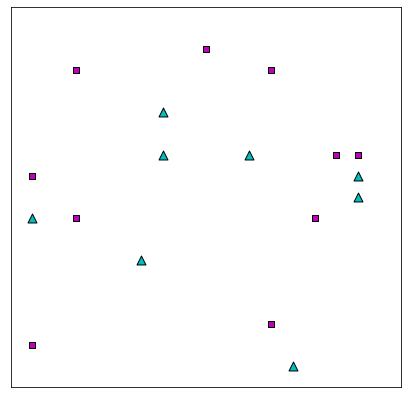

In [7]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xticks([])
ax.set_yticks([])
scatter = ax.scatter(all_positions.iloc[0][0][:,0], all_positions.iloc[0][0][:,1], 
                  s=80, cmap="jet", edgecolor="k",  marker="^", color = "c")

boxes = ax.scatter(all_positions.iloc[0][1][:,0], all_positions.iloc[0][1][:,1], 
                  s=40, cmap="jet", edgecolor="k", marker="s", color="m")


ax.axis([0, WIDTH, 0, HEIGHT])
def update(frame_number):
    scatter.set_offsets(all_positions.iloc[frame_number][0])
    boxes.set_offsets(all_positions.iloc[frame_number][1])
    return scatter

anim = animation.FuncAnimation(fig, update, frames=MAX_ITERATIONS)

### Animación 🎬

Al final de todo, vamos a ver la animacion de la simulacion de todos los datos recolectados. Esta se generara a través de una librería que convertirá todo a formato HTML5.

In [8]:
anim

## Análisis y conclusiones
Si cambiamos los agentes a que sean más, podemos observar que la ejecución tarda más pero la simulación es más corta. Si ponemos más agentes existen más movimientos, pero menos iteraciones.<p> Una forma de reducir el tiempo de ejecución quizá sería utilizando un agente 'más inteligente' o quizá algoritmos de inteligencia articial y ciencia de datos para reducir todo el tiempo e incluso los pasos que deben de seguir los robots para poder completar con el objetivo de la simulación.<p> Estuvo padre. Gracias! :)

## Parte 2 (Unity)
### Está disponible en el repositorio de GitHub!<br>
#### Link: https://github.com/A01706155/TC2008B.1-Actividad-Integradora